###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 Semester 1

## Assignment 1: Music genre classification with naive Bayes


**Student ID(s):**     1271851


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing

def preprocess(filename):
    data = pd.read_csv(filename)
    first_column = data.columns[0]
    data = data.drop("filename", axis=1)
    
    # Create array of all features and feature values
    features = data.drop("label", axis = 1)
    return data, features

In [3]:
# This function should calculate prior probabilities and likelihoods from the training data and using
# them to build a naive Bayes model
    
def train(data):
    # Estimate mean and variance of each label
    means = data.groupby(["label"]).mean()
    var = data.groupby(["label"]).var() 
    
    # Estimate prior probabilities of each label
    prior = (data.groupby("label").count() / len(data)).iloc[:,1]
    
    # Store all labels
    labels = np.unique(data["label"].tolist())

    return means, var, prior, labels

In [4]:
# This function should predict classes for new items in a test dataset

# Calculate the Gaussian probability distribution function for x
def gaussian_probability(x, mean, variance):
    sd = np.sqrt(variance)
    
    prob = (np.e ** (-0.5 * ((x - mean)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
    
    return prob
    

def predict(test):
    predictions = []
    epsilon = 0.001
    
    # Loop through each instance
    for i in test.index:
        
        class_likelihood = []
        instance = test.loc[i]
        
        # Loop through each unique label
        for cls in labels:
            feature_likelihoods = []
            
            # Append log of the label prior
            feature_likelihoods.append(np.log(prior[cls]))
            
            # Loop through each feature
            for col in train_features.columns:
                
                data = instance[col]
                
                # Skip feature if attribute is missing
                if (bool(data) == False):
                    continue
                
                # Find the mean and variance of column 'col' that are in class 'cls'
                mean = means[col].loc[cls]
                variance = var[col].loc[cls]
                
                likelihood = gaussian_probability(data, mean, variance)
                
                if likelihood != 0:
                    # Find the log-likelihood
                    likelihood = np.log(likelihood)
                else:
                    likelihood = epsilon
                    
                feature_likelihoods.append(likelihood)
            
            # Calculate posterior
            posterior = sum(feature_likelihoods) 
            class_likelihood.append(posterior)
            
        # Find the position of largest posterior and append prediction
        max_posterior = class_likelihood.index(max(class_likelihood))
        prediction = labels[max_posterior]
        predictions.append(prediction)
                
    return predictions

In [13]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels

def evaluate(predictions, true_labels):
    # Calculate the accuracy 
    correct = 0
    tp = 0
    fp = 0 
    fn = 0
    total = len(predictions)
    for i in range(total):
        if predictions[i] == true_labels[i]:
            correct += 1
        if predictions[i] == 'classical':
            if predictions[i] == true_labels[i]:
                tp += 1
            else:
                fp += 1
        if true_labels[i] == 'classical':
            if predictions[i] != true_labels[i]:
                fn += 1
            
    accuracy = correct / total
    
    # Calculate the precision
    if (tp == 0):
        precision = 0
    else:
        precision = tp / (tp + fp)
    
    # Calculate the recall
    if (tp == 0):
        recall = 0
    else:
        recall = tp / (tp + fn)
    return accuracy, precision, recall

## Task 1. Pop vs. classical music classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### Q1
Compute and report the accuracy, precision, and recall of your model (treat "classical" as the "positive" class).

In [6]:
# Run all code blocks above, then this code block to determine accuracy, precision, and recall of the model

train_df, train_features = preprocess("datasets/pop_vs_classical_train.csv")
test_df, test_features = preprocess("datasets/pop_vs_classical_test.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print(accuracy)
print(precision)
print(recall)


0.9767441860465116
0.9523809523809523
1.0


### Q2
For each of the features X below, plot the probability density functions P(X|Class = pop) and P(X|Class = classical). If you had to classify pop vs. classical music using just one of these three features, which feature would you use and why? Refer to your plots to support your answer.
- spectral centroid mean
- harmony mean
- tempo

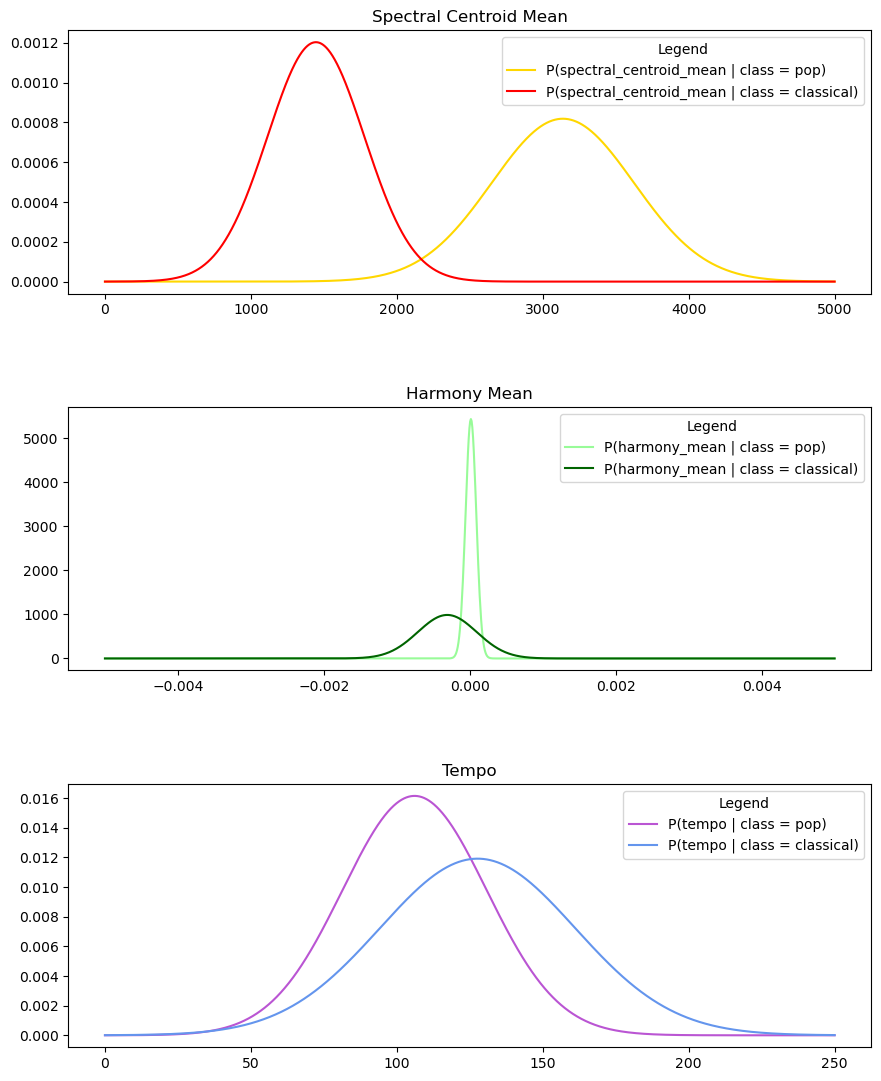

In [7]:
# Run this code block after all code above to attain desired results

test_df['predictions'] = predictions

spectral_centroid_mean = test_df[['spectral_centroid_mean', 'predictions']].copy()
harmony_mean = test_df[['harmony_mean', 'predictions']].copy()
tempo = test_df[['tempo', 'predictions']].copy()

# Plotting spectral centroid mean distribution
pop = spectral_centroid_mean.loc[spectral_centroid_mean['predictions'] == 'pop']
classical = spectral_centroid_mean.loc[spectral_centroid_mean['predictions'] == 'classical']

pmean = pop.iloc[:,0].mean()
psd = pop.iloc[:,0].std()
cmean = classical.iloc[:,0].mean()
csd = classical.iloc[:,0].std()
    
x = np.arange(0, 5000, 0.01)

plt.figure(figsize=(10,12))
plt.subplot(3, 1, 1)
plt.plot(x, stats.norm.pdf(x, pmean, psd), label='P(spectral_centroid_mean | class = pop)', color='gold')
plt.plot(x, stats.norm.pdf(x, cmean, csd), label='P(spectral_centroid_mean | class = classical)', color='red')
plt.legend(title='Legend')
plt.title("Spectral Centroid Mean")

# Plotting harmony mean distribution
pop = harmony_mean.loc[harmony_mean['predictions'] == 'pop']
classical = harmony_mean.loc[harmony_mean['predictions'] == 'classical']

pmean = pop.iloc[:,0].mean()
psd = pop.iloc[:,0].std()
cmean = classical.iloc[:,0].mean()
csd = classical.iloc[:,0].std()
    
x = np.arange(-0.005, 0.005, 0.00001)

plt.subplot(3, 1, 2)
plt.plot(x, stats.norm.pdf(x, pmean, psd), label='P(harmony_mean | class = pop)', color='palegreen')
plt.plot(x, stats.norm.pdf(x, cmean, csd), label='P(harmony_mean | class = classical)', color='darkgreen')
plt.legend(title='Legend')
plt.title("Harmony Mean")

# Plotting tempo distribution
pop = tempo.loc[harmony_mean['predictions'] == 'pop']
classical = tempo.loc[harmony_mean['predictions'] == 'classical']

pmean = pop.iloc[:,0].mean()
psd = pop.iloc[:,0].std()
cmean = classical.iloc[:,0].mean()
csd = classical.iloc[:,0].std()
    
x = np.arange(0,250, 0.001)

plt.subplot(3, 1, 3)
plt.plot(x, stats.norm.pdf(x, pmean, psd), label='P(tempo | class = pop)', color='mediumorchid')
plt.plot(x, stats.norm.pdf(x, cmean, csd), label='P(tempo | class = classical)', color='cornflowerblue')
plt.legend(title='Legend')
plt.title("Tempo")


plt.tight_layout(pad=5.0)

## Task 2. 10-way music genre classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### Q3
Compare the performance of the full model to a 0R baseline and a one-attribute baseline. The one-attribute baseline should be the best possible naive Bayes model which uses only a prior and a single attribute. In your write-up, explain how you implemented the 0R and one-attribute baselines.

### Q4
Train and test your model with a range of training set sizes by setting up your own train/test splits. With each split, use cross-fold validation so you can report the performance on the entire dataset (1000 items). You may use built-in functions to set up cross-validation splits. In your write-up, evaluate how model performance changes with training set size.

### Q5
Implement a kernel density estimate (KDE) naive Bayes model and compare its performance to your Gaussian naive Bayes model. You may use built-in functions and automatic ("rule of thumb") bandwidth selectors to compute the KDE probabilities, but you should implement the naive Bayes logic yourself. You should give the parameters of the KDE implementation (namely, what bandwidth(s) you used and how they were chosen) in your write-up.

### Q6
Modify your naive Bayes model to handle missing attributes in the test data. Recall from lecture that you can handle missing attributes at test by skipping the missing attributes and computing the posterior probability from the non-missing attributes. Randomly delete some attributes from the provided test set to test how robust your model is to missing data. In your write-up, evaluate how your model's performance changes as the amount of missing data increases.

In [23]:
train_df, train_features = preprocess("datasets/gztan_train.csv")
test_df, test_features = preprocess("datasets/gztan_test.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("No missing values: ")
print(accuracy)

test_df, test_features = preprocess("datasets/gztan_test_missing1.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("1 missing value for the first 50 instances: ")
print(accuracy)

test_df, test_features = preprocess("datasets/gztan_test_missing2.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("1 missing value for the first 100 instances: ")
print(accuracy)

test_df, test_features = preprocess("datasets/gztan_test_missing3.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("1 missing value for all 200 instances: ")
print(accuracy)

test_df, test_features = preprocess("datasets/gztan_test_missing4.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("1 missing value for all 200 instances + two missing columns: ")
print(accuracy)

test_df, test_features = preprocess("datasets/gztan_test_missing5.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("1 missing value for all 200 instances + seven missing columns: ")
print(accuracy)

test_df, test_features = preprocess("datasets/gztan_test_missing6.csv")

means, var, prior, labels = train(train_df)
predictions = predict(test_features)

true_labels = test_df['label'].tolist()

accuracy, precision, recall = evaluate(predictions, true_labels)

print("1 missing value for all 200 instances + seven missing columns + extra chunks of missing attributes: ")
print(accuracy)


No missing values: 
0.495
1 missing value for the first 50 instances: 
0.455
1 missing value for the first 100 instances: 
0.355
1 missing value for all 200 instances: 
0.095
1 missing value for all 200 instances + two missing columns: 
0.095
1 missing value for all 200 instances + seven missing columns: 
0.095
1 missing value for all 200 instances + seven missing columns: 
0.095
